In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tqdm import tqdm
from tqdm.autonotebook import tqdm


C:\Users\miche\AppData\Local\Temp\ipykernel_10680\2021721994.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Functions ###

In [ ]:
def stacking_uw_plot(outfile_path, data, step_wf_to_plot, time, remove_starting_noise, highlight_start, higlight_end, time_ticks, ylim_plot, xlim_plot):
    outfile_name = outfile_path.split('\\')[-1]
    f = plt.figure(figsize = (13,4))
    plt.title(outfile_name, fontsize = 1
    for wf in range (0,len(data), step_wf_to_plot):
        plt.plot(time[remove_starting_noise:], data[wf][remove_starting_noise:], color = 'black', linewidth = 0.8, alpha = 0.5)
    plt.plot(time[highlight_start:highlight_end], data[wf][highlight_start:highlight_end], color = 'red')
    plt.xlabel('Time [$\mu s$]', fontsize = 12)
    plt.ylabel('Amplitude [.]', fontsize = 12)
    plt.xticks(time_ticks)
    plt.ylim(-ylim_plot,ylim_plot)
    plt.xlim(time[0], xlim_plot)
    plt.grid(alpha = 0.1)
    plt.savefig(outfile_path + format, dpi = 300)
    plt.close()
    #print(outfile_path)

### Main code ###

In [3]:
percorso = os.getcwd()
percorso

#INPUT and OUTPUT FOLDERS
test_dir_path = 'C:\\Users\\miche\\Documents\\Università\\PhD\\experiments_uw\\s0097\\data_tsv' 

outdir_name = "images"
outdir_path = os.path.join(test_dir_path,outdir_name)

if not os.path.exists(outdir_path):
    os.mkdir(outdir_path)    

format = '.png'

### Some plot features ###
row_to_plot = 200  #which waveform to plot
remove_starting_noise = 0
highlight_start = 0
highlight_end = 0
ylim_plot = 500
xlim_plot= 20
ticks_steps = 1 #[microseconds] plot ticks 
step_wf_to_plot = 10  #more waveforms on the same plot

### METADATA ###
encoding = 'iso8859' #read greek letters             
    
for infile_name in tqdm(iterable=os.listdir(test_dir_path), desc='Opening files'):
    extension = infile_name.split('.')[-1]
    if extension == 'tsv': #DISCARD EUR AND INI FILES
        #print(infile_name)
        ### IMPORT DATA ###
        file_path = os.path.join(test_dir_path, infile_name)
        # data = pd.read_csv(file_path, encoding = encoding, sep = '\t', skiprows = 4, header = None).dropna()
        with open(file_path,"rb") as infile:
            general = next(infile).decode(encoding)
            amplitude_scale = next(infile).decode(encoding)
            time_scale = next(infile).decode(encoding)
           #  print(time_scale)           # check what is going on below
            stupid_scale = next(infile).decode(encoding)
            # DEFINE TIME SCALE USING METADATA
            time_info = re.findall(r"\d+\.*\d*",time_scale)   # find all float in the string "time_scale" using regular expression:
                                                        # the first argument of findall must be a "regular expression". It start with an r so
                                                        # is an r-string, that means "\" can be read as a normal character
                                                        # The regular expression "\d+\.*\d*" means "match all the digits that are adiacent as
                                                        # a single entry and, if they are followed by a dot and some other digits, they are still
                                                        # the same numbers". So it gets as a single number both 1, 10, 1.4, 10.42 etc.
            time_info = [float(entry) for entry in time_info]           # just convert the needed info in float number
            time = np.arange(time_info[0],time_info[1],time_info[3])
            number_of_samples = time_info[2]
            time_ticks = np.arange(time[0], time[-1], ticks_steps)
            
            ### HANDLING EMPTY LINES###
            data_list = []             
            for line in infile:
                line = line.decode(encoding)
                line = line.split("\t")
                if len(line) < number_of_samples:   #The empty lines are surely shorter than wf lines (determined by the number of samples)
                    continue
                data_list.append(line)
            
            data = np.array(data_list).astype(float)  #convert list in array
                
            
            #CHOOSE THE FILE PATH OF THE OUTPUT
            infile_name = infile_name.split('.')[0]    # remove extension
            outfile_name = "_".join(("waveform",infile_name))
            outfile_path = os.path.join(outdir_path, outfile_name)
                ### PLOT DATA ###
            try:
                stacking_uw_plot(outfile_path, data, step_wf_to_plot, time, remove_starting_noise, highlight_start, higlight_end, time_ticks, ylim_plot, xlim_plot)
            except:
                print(infile_name + "diocane")

Opening files:   0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
len(data)

384

C:\Users\miche\AppData\Local\Temp\ipykernel_10680\45419633.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot()


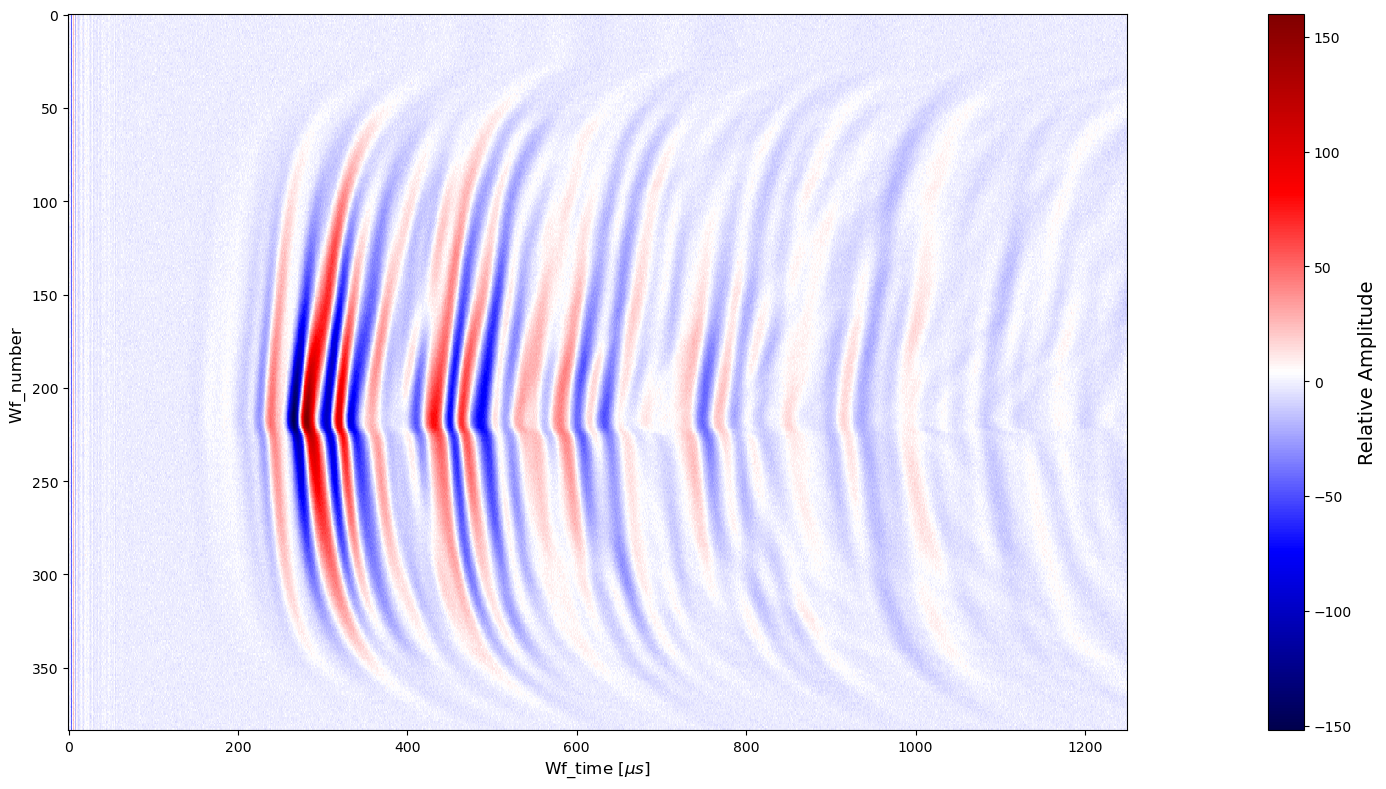

In [19]:
fig,ax1 = plt.subplots(ncols=2,figsize=(15,8))
ax1 = plt.subplot()
cmap = plt.get_cmap('seismic')
im = ax1.imshow(data, aspect='auto',origin='upper',interpolation='none',cmap = cmap, extent = [])

cbar= fig.colorbar(im,pad=0.1)
cbar.set_label("Relative Amplitude", fontsize = 14)

ax1.set_xlabel('Wf_time [$\mu s$]', fontsize = 12)
ax1.set_ylabel('Wf_number ', fontsize = 12)



fig.tight_layout()